<a href="https://colab.research.google.com/github/Syd001978/testing-Bell/blob/main/BELL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Step 1: Import library
import pandas as pd


df_benign = pd.read_csv("/content/drive/MyDrive/bell/benign.csv", on_bad_lines="skip")

# Step 4: Tampilkan info dataset
print("=== Info Dataset ===")
print(df_benign.info())  # tipe data, jumlah null, dll




/tmp/ipython-input-2147028864.py:5: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benign = pd.read_csv("/content/drive/MyDrive/bell/benign.csv", on_bad_lines="skip")


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 395261 entries, ('US', np.float64(15169.0), np.int64(46), '172.217.1.174', "b'google.com.'", 'CA', nan, 'US', '1997-09-15 04:00:00', '0', '0', "['GOOGLE.COM'", " 'google.com']", '1.0', '0', 'Google LLC', '7', 'google', '0', '-1.0', "['g'", " 'o'", " 'o'") to ('AU', np.float64(24446.0), np.int64(14399), '202.47.4.14', "b'drterrencescamp.com.au.'", nan, nan, nan, nan, '0', '0', nan, '2693696.0', '0', nan, '16', 'terrence', '0', '-1.0', "['d'", " 'r'", " 't'", " 'e'")
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Country             394697 non-null  object
 1   ASN                 393181 non-null  object
 2   TTL                 392512 non-null  object
 3   IP                  391807 non-null  object
 4   Domain              389176 non-null  object
 5   State               382984 non-null  object
 6   Registrant_Name     380518 no

In [ ]:
# Step 1: Import library
import pandas as pd


df_malware = pd.read_csv("/content/drive/MyDrive/bell/malware.csv", on_bad_lines="skip")

# Step 4: Tampilkan info dataset
print("=== Info Dataset ===")
print(df_malware.info())  # tipe data, jumlah null, dll

print("\n=== Nama Kolom / Fitur ===")
print(df_malware.columns.tolist())


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2896 entries, ('US', np.float64(26347.0), '14399', '67.205.14.183', "b'dicrophani.com.'", np.int64(0), 'hani', 'DICROPHANI.COM', '0', np.int64(0), 'dicrophani', nan, '0', '4277 days', ' 21:07:56.450015', '2.9631196533066344', '6.0', "['abuse@name.com'", " 'roxics@gmail.com']", '2008-08-04 04:20:05', 'Scape Films', "defaultdict(<class 'int'>", " {'d': 1", " 'n': 1", " 'a': 1", " 'i': 2", " 'r': 1", " 'h': 1", " 'c': 1", " 'o': 1", " 'p': 1})", "['di'", " 'ic'", " 'cr'", " 'ro'", " 'op'", " 'ph'", " 'ha'", " 'an'") to ('DE', np.float64(8767.0), '1799', '62.245.182.48', "b'web.asamnet.de.'", np.int64(0), 'mnet', 'asamnet.de', '0', np.int64(1), 'asamnet', nan, '0', '0', '2.7813014714884527', '0.0', nan, nan, nan, "defaultdict(<class 'int'>", " {'t': 1", " 'n': 1", " 'a': 2", " 'm': 1", " 's': 1", " 'b': 1", " 'w': 1", " 'e': 2})", "['as'", " 'sa'", " 'am'", " 'mn'", " 'ne'", " 'et']", nan, '0', nan, '-1.0', '0')
Data co

In [ ]:
import pandas as pd

# Load dataset malware
df_malware = pd.read_csv("/content/drive/MyDrive/bell/malware.csv", on_bad_lines="skip")

# Cari posisi kolom "Page_Rank"
end_col_idx = df_malware.columns.get_loc("Page_Rank")

# Ambil semua kolom sampai Page_Rank (inklusif)
df_malware = df_malware.iloc[:, :end_col_idx+1]

print("Shape setelah drop:", df_malware.shape)
print("\nKolom tersisa:\n", df_malware.columns.tolist())


Shape setelah drop: (2896, 25)

Kolom tersisa:
 ['Country', 'ASN', 'TTL', 'IP', 'Domain', 'oc_8', 'longest_word', 'Domain_Name', 'dec_32', 'subdomain', 'sld', 'Registrant_Name', 'hex_32', 'Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'Creation_Date_Time', 'Organization', 'char_distribution', '2gram', 'State', 'oc_32', 'Country.1', 'Page_Rank']


In [ ]:
import pandas as pd
import csv

def safe_read_csv(path, label, clip_to_pagerank=True):
    """
    Baca CSV secara robust + tambah kolom Label.
    Semua kolom dibaca sebagai string dulu (dtype=str) supaya aman,
    preprocessing numerik dilakukan nanti.
    """
    tried = []
    df = None
    # Strategi baca berurutan
    attempts = [
        dict(engine="c", on_bad_lines="skip", dtype=str, encoding="utf-8"),
        dict(engine="python", on_bad_lines="skip", dtype=str, encoding="utf-8"),
        dict(engine="python", on_bad_lines="skip", dtype=str, encoding="utf-8", sep=None),  # sniff delimiter
        dict(engine="python", on_bad_lines="skip", dtype=str, encoding="utf-8", delimiter=";"),
        dict(engine="python", on_bad_lines="skip", dtype=str, encoding="utf-8", delimiter="\t"),
        dict(engine="python", on_bad_lines="skip", dtype=str, encoding="latin1"),
    ]
    for kw in attempts:
        try:
            df = pd.read_csv(path, **kw)
            break
        except Exception as e:
            tried.append((kw, str(e)))
            df = None

    if df is None:
        msg = "\n".join([f"- {k}: {err}" for k, err in tried])
        raise RuntimeError(f"Gagal membaca {path}. Detail percobaan:\n{msg}")

    # Bersihkan nama kolom
    df.columns = [c.strip() for c in df.columns]

    # Optional: potong sampai Page_Rank
    if clip_to_pagerank:
        if "Page_Rank" in df.columns:
            end_idx = df.columns.get_loc("Page_Rank")
            df = df.iloc[:, :end_idx+1]
        else:
            # Kadang ada variasi nama (case/space). Coba cari longgar.
            candidates = [c for c in df.columns if c.replace(" ", "").lower() == "page_rank"]
            if candidates:
                end_idx = df.columns.get_loc(candidates[0])
                df = df.iloc[:, :end_idx+1]
            else:
                print(f"[WARN] Kolom 'Page_Rank' tidak ditemukan di {path}. Kolom tidak dipotong.")

    # Pastikan tidak ada Label sebelumnya yang bentrok
    if "Label" in df.columns:
        df = df.drop(columns=["Label"])

    df["Label"] = int(label)
    return df

# ====== GUNAKAN BEGIN ======
# Ganti nama file sesuai punyamu
MALWARE_PATH = "/content/drive/MyDrive/bell/malware.csv"   # contoh: "BellDNS_malware.csv"
BENIGN_PATH  = "/content/drive/MyDrive/bell/benign.csv"    # contoh: "BellDNS_benign.csv"

df_malware = safe_read_csv(MALWARE_PATH, label=1, clip_to_pagerank=True)
df_benign  = safe_read_csv(BENIGN_PATH,  label=0, clip_to_pagerank=True)

print(">> Malware shape:", df_malware.shape)
print(">> Benign  shape:", df_benign.shape)

# Samakan kolom (irisan kolom)
common_cols = df_malware.columns.intersection(df_benign.columns)
# Pastikan kolom Label ikut
if "Label" not in common_cols:
    common_cols = common_cols.tolist() + ["Label"]

df_malware_aligned = df_malware[common_cols].copy()
df_benign_aligned  = df_benign[common_cols].copy()

# Merge
df_all = pd.concat([df_malware_aligned, df_benign_aligned], axis=0, ignore_index=True)

print(">> Dataset gabungan:", df_all.shape)
print(">> Distribusi label:\n", df_all["Label"].value_counts())
print(">> Kolom final (<= Page_Rank + Label):\n", df_all.columns.tolist())

# (Opsional) simpan hasil merge biar enak dipakai lagi
# df_all.to_csv("/content/drive/MyDrive/bell/bell_merge.csv", index=False)
print("Disimpan ke BellDNS_merged_upto_PageRank.csv")


>> Malware shape: (2896, 26)
>> Benign  shape: (395261, 39)
>> Dataset gabungan: (398157, 26)
>> Distribusi label:
 Label
0    395261
1      2896
Name: count, dtype: int64
>> Kolom final (<= Page_Rank + Label):
 ['Country', 'ASN', 'TTL', 'IP', 'Domain', 'oc_8', 'longest_word', 'Domain_Name', 'dec_32', 'subdomain', 'sld', 'Registrant_Name', 'hex_32', 'Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'Creation_Date_Time', 'Organization', 'char_distribution', '2gram', 'State', 'oc_32', 'Country.1', 'Page_Rank', 'Label']
Disimpan ke BellDNS_merged_upto_PageRank.csv


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398157 entries, 0 to 398156
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Country             397341 non-null  object
 1   ASN                 395924 non-null  object
 2   TTL                 395276 non-null  object
 3   IP                  394633 non-null  object
 4   Domain              392028 non-null  object
 5   oc_8                352594 non-null  object
 6   longest_word        392569 non-null  object
 7   Domain_Name         382295 non-null  object
 8   dec_32              380053 non-null  object
 9   subdomain           385463 non-null  object
 10  sld                 309291 non-null  object
 11  Registrant_Name     383324 non-null  object
 12  hex_32              381364 non-null  object
 13  Domain_Age          393216 non-null  object
 14  entropy             393027 non-null  object
 15  Name_Server_Count   299570 non-null  object
 16  Em

In [ ]:
# Daftar fitur yang dianggap kurang penting / redundant
drop_cols = [
    "oc_8",
    "oc_32",
    "dec_32",
    "hex_32",
    "Registrant_Name",
    "Country.1",
    "Creation_Date_Time"
]

# Drop kolom
df_cleaned = df_all.drop(columns=drop_cols, errors="ignore")

print("Kolom setelah drop:", df_cleaned.columns.tolist())
print("Shape setelah drop:", df_cleaned.shape)

# Simpan hasil
# df_cleaned.to_csv("/content/drive/MyDrive/bell/Bell_cleaned.csv", index=False)
print("Disimpan ke BellDNS_cleaned.csv")

Kolom setelah drop: ['Country', 'ASN', 'TTL', 'IP', 'Domain', 'longest_word', 'Domain_Name', 'subdomain', 'sld', 'Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'Organization', 'char_distribution', '2gram', 'State', 'Page_Rank', 'Label']
Shape setelah drop: (398157, 19)
Disimpan ke BellDNS_cleaned.csv


In [ ]:
import numpy as np
import re, math
from collections import Counter

df = pd.read_csv("/content/drive/MyDrive/bell/Bell_cleaned.csv")
pd.set_option("display.max_columns", 40)
print("Before: info singkat")
print(df.info())
print("\nMissing per kolom:\n", df.isna().sum())

Before: info singkat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398157 entries, 0 to 398156
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Country            397341 non-null  object
 1   ASN                395924 non-null  object
 2   TTL                395276 non-null  object
 3   IP                 394633 non-null  object
 4   Domain             392028 non-null  object
 5   longest_word       392569 non-null  object
 6   Domain_Name        382295 non-null  object
 7   subdomain          385463 non-null  object
 8   sld                309291 non-null  object
 9   Domain_Age         393216 non-null  object
 10  entropy            393027 non-null  object
 11  Name_Server_Count  299570 non-null  object
 12  Emails             376912 non-null  object
 13  Organization       386893 non-null  object
 14  char_distribution  335535 non-null  object
 15  2gram              328881 non-null  object
 16 

In [ ]:
# BEFORE sample
print("Domain sample (before):")
print(df['Domain'].head(6))

# helper entropy
def shannon_entropy(s):
    if pd.isna(s): return np.nan
    s = str(s)
    if len(s) == 0: return 0.0
    probs = [v/len(s) for v in Counter(s).values()]
    return -sum(p*math.log2(p) for p in probs)

# create domain features
df['domain_len'] = df['Domain'].astype(str).str.len()
df['domain_num_digits'] = df['Domain'].astype(str).str.count(r'\d')
df['domain_has_digits'] = (df['domain_num_digits'] > 0).astype(int)
df['domain_dot_count'] = df['Domain'].astype(str).str.count(r'\.')
df['domain_hyphen_count'] = df['Domain'].astype(str).str.count('-')
df['domain_entropy_raw'] = df['Domain'].apply(shannon_entropy)
df['domain_digit_ratio'] = df['domain_num_digits'] / df['domain_len'].replace(0, np.nan)

# AFTER sample
print("\nDomain features (after):")
print(df[['Domain','domain_len','domain_num_digits','domain_has_digits','domain_entropy_raw']].head(6))


Domain sample (before):
0    -1.0
1     'o'
2    -1.0
3    -1.0
4     'p'
5     's'
Name: Domain, dtype: object

Domain features (after):
  Domain  domain_len  domain_num_digits  domain_has_digits  domain_entropy_raw
0   -1.0           4                  2                  1                 2.0
1    'o'           4                  0                  0                 1.5
2   -1.0           4                  2                  1                 2.0
3   -1.0           4                  2                  1                 2.0
4    'p'           4                  0                  0                 1.5
5    's'           4                  0                  0                 1.5


In [ ]:
if 'Domain_Name' in df.columns:
    # normalize simple dan bandingkan
    comp = (df['Domain'].astype(str).str.lower().str.strip('.') ==
            df['Domain_Name'].astype(str).str.lower().str.strip('.'))
    ratio_eq = comp.mean()
    print(f"Proporsi Domain == Domain_Name (setelah normalize): {ratio_eq:.3f}")
    if ratio_eq > 0.98:
        print(">> Domain_Name sangat mirip dengan Domain — drop Domain_Name")
        df = df.drop(columns=['Domain_Name'])
    else:
        print(">> Domain_Name berbeda -> biarkan atau inspect manual")


Proporsi Domain == Domain_Name (setelah normalize): 0.004
>> Domain_Name berbeda -> biarkan atau inspect manual


In [ ]:
print("Domain_Age sample (before):", df['Domain_Age'].sample(6).tolist())

# ekstrak angka (contoh '4277 days' -> 4277), handle variasi
df['Domain_Age_days'] = df['Domain_Age'].astype(str).str.extract(r'(\d+)')
df['Domain_Age_days'] = pd.to_numeric(df['Domain_Age_days'], errors='coerce')

# indicator missing + fill median
df['Domain_Age_missing'] = df['Domain_Age_days'].isna().astype(int)
median_age = df['Domain_Age_days'].median()
df['Domain_Age_days'] = df['Domain_Age_days'].fillna(median_age)

print("Domain_Age_days sample (after):", df['Domain_Age_days'].head(6).tolist())


Domain_Age sample (before): [" 'k-b'", "['ind'", " 'f': 1", '0', ' 86)]', " 't': 1"]
Domain_Age_days sample (after): [1.0, 86.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print("Entropy sample (before):", df['entropy'].sample(6).tolist())
df['entropy'] = pd.to_numeric(df['entropy'], errors='coerce')
df['entropy_missing'] = df['entropy'].isna().astype(int)
df['entropy'] = df['entropy'].fillna(df['entropy'].median())
print("Entropy (after) stats:", df['entropy'].describe().round(3).to_dict())


Entropy sample (before): [' 86)', '-1.0', " 'a': 1", " 'ctu'", " 'j': 1})", "[('free.fr'"]
Entropy (after) stats: {'count': 398157.0, 'mean': 85.861, 'std': 25354.405, 'min': -1.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 10073299.0}


In [ ]:
print("Name_Server_Count (before) sample:", df['Name_Server_Count'].sample(6).tolist())
df['Name_Server_Count'] = pd.to_numeric(df['Name_Server_Count'], errors='coerce')
df['NS_missing'] = df['Name_Server_Count'].isna().astype(int)
df['Name_Server_Count'] = df['Name_Server_Count'].fillna(df['Name_Server_Count'].median())
print("Name_Server_Count (after) stats:", df['Name_Server_Count'].describe().round(3).to_dict())


Name_Server_Count (before) sample: [nan, " 'ro'", " 'w': 4", " 'e': 1", '11', " 'uz'"]
Name_Server_Count (after) stats: {'count': 398157.0, 'mean': 908.732, 'std': 206845.607, 'min': -1.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 89118911.0}


In [ ]:
print("Page_Rank (before) sample:", df['Page_Rank'].sample(6).tolist())
df['Page_Rank'] = pd.to_numeric(df['Page_Rank'], errors='coerce')
df['Page_Rank_missing'] = df['Page_Rank'].isna().astype(int)
# fill dengan median untuk model, tapi tetap simpan indikator missing
df['Page_Rank'] = df['Page_Rank'].fillna(df['Page_Rank'].median())
print("Page_Rank (after) stats:", df['Page_Rank'].describe().round(3).to_dict())


Page_Rank (before) sample: [" 'zh'", " 'gli'", " 'w': 1", " 'otu'", ' LTD', '4.0']
Page_Rank (after) stats: {'count': 398157.0, 'mean': 916.327, 'std': 208752.738, 'min': -1.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 88856856.0}


In [ ]:
df['char_distribution_len'] = df['char_distribution'].astype(str).replace('nan', '').str.len()
# 2gram: hitung berapa item ada (cara healty: hitung koma jika bukan 'nan')
def count_items(x):
    if pd.isna(x) or str(x).strip().lower() in ['nan','[]','none','']:
        return 0
    s = str(x)
    return max(1, s.count(',')+1)
df['2gram_count'] = df['2gram'].apply(count_items)
print("char_distribution_len & 2gram_count sample:")
print(df[['char_distribution_len','2gram_count']].head(6))


char_distribution_len & 2gram_count sample:
   char_distribution_len  2gram_count
0                      4            1
1                      6            1
2                      0            0
3                      0            0
4                      6            1
5                      6            1


In [ ]:
cat_to_freq = ['sld','subdomain','ASN','Country','Organization','State']
for c in cat_to_freq:
    if c in df.columns:
        freq = df[c].fillna('##NA##').value_counts()
        df[c + '_freq'] = df[c].fillna('##NA##').map(freq).fillna(0).astype(int)
        print(f"{c}: unique before={df[c].nunique(dropna=True)}, freq-encoded -> {c+'_freq'}")
# contoh: lihat hasil
print(df[['sld','sld_freq']].head(6))


sld: unique before=16010, freq-encoded -> sld_freq
subdomain: unique before=27707, freq-encoded -> subdomain_freq
ASN: unique before=4088, freq-encoded -> ASN_freq
Country: unique before=1153, freq-encoded -> Country_freq
Organization: unique before=28230, freq-encoded -> Organization_freq
State: unique before=35068, freq-encoded -> State_freq
                   sld  sld_freq
0                  'r'        51
1             [('g.co'         3
2   11.111111111111109         4
3   11.111111111111109         4
4   ('miibeian.gov.cn'         4
5                  86)       140


In [ ]:
def emails_count(x):
    if pd.isna(x) or str(x).strip().lower() in ['nan','[]','none','']:
        return 0
    s = str(x)
    # simple count of '@' occurrences (proxy)
    return s.count('@') or max(1, s.count(',')+1)

df['has_email'] = df['Emails'].notna() & (df['Emails'].astype(str).str.strip().str.lower() != 'nan')
df['emails_count'] = df['Emails'].apply(emails_count)
print(df[['Emails','has_email','emails_count']].head(6))


            Emails  has_email  emails_count
0             'i']       True             1
1  FastDomain Inc.       True             1
2              NaN      False             0
3              NaN      False             0
4             -1.0       True             1
5                0       True             1


In [ ]:
to_drop = ['Domain_Age','char_distribution','2gram','Emails']   # adjust sesuai kebutuhan
df_processed = df.drop(columns=[c for c in to_drop if c in df.columns], errors='ignore').copy()

print("After processing — info singkat:")
print(df_processed.info())
print("\nContoh baris akhir (before->after visible features):")
display(df_processed.head(6))


After processing — info singkat:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398157 entries, 0 to 398156
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Country                397341 non-null  object 
 1   ASN                    395924 non-null  object 
 2   TTL                    395276 non-null  object 
 3   IP                     394633 non-null  object 
 4   Domain                 392028 non-null  object 
 5   longest_word           392569 non-null  object 
 6   Domain_Name            382295 non-null  object 
 7   subdomain              385463 non-null  object 
 8   sld                    309291 non-null  object 
 9   entropy                398157 non-null  float64
 10  Name_Server_Count      398157 non-null  float64
 11  Organization           386893 non-null  object 
 12  State                  385001 non-null  object 
 13  Page_Rank              398157 non-null  float64
 14  Lab

,Country,ASN,TTL,IP,Domain,longest_word,Domain_Name,subdomain,sld,entropy,Name_Server_Count,Organization,State,Page_Rank,Label,domain_len,domain_num_digits,domain_has_digits,domain_dot_count,domain_hyphen_count,domain_entropy_raw,domain_digit_ratio,Domain_Age_days,Domain_Age_missing,entropy_missing,NS_missing,Page_Rank_missing,char_distribution_len,2gram_count,sld_freq,subdomain_freq,ASN_freq,Country_freq,Organization_freq,State_freq,has_email,emails_count
0,'ni'],MI,0,US,-1.0,0,['d','c','r',0.0,0.0,[('apple.com',86)],0.0,1,4,2,1,1,1,2.0,0.5,1.0,1,1,1,1,4,1,51,142,1,1,116,166,True,1
1,0,0,['d','i','o','n','e',8,[('g.co',0.0,-1.0,-1.0,'onn',0.0,1,4,0,0,0,0,1.5,0.0,86.0,0,1,0,0,6,1,3,63,35470,24427,324,1,True,1
2,86),('miibeian.gov.cn',86)],cn,-1.0,0,-1.0,'hj3'],11.111111111111109,0.0,0.0,NaN,NaN,0.0,1,4,2,1,1,1,2.0,0.5,1.0,1,1,1,1,0,0,4,2,6,26,11264,13156,False,0
3,86),('miibeian.gov.cn',86)],cn,-1.0,0,-1.0,'hj3'],11.111111111111109,0.0,0.0,NaN,NaN,0.0,1,4,2,1,1,1,2.0,0.5,1.0,1,1,1,1,0,0,4,2,6,26,11264,13156,False,0
4,['h','r','y','s','p','p'],8,86),('miibeian.gov.cn',0.0,0.0,'rys','pap'],0.0,1,4,0,0,0,0,1.5,0.0,1.0,0,1,0,1,6,1,4,23123,20338,13,1,1,True,1
5,0,['h','r','y','s','a','p'],[('miitbeian.gov.cn',86),-1.0,0.0,['hry','spa',0.0,1,4,0,0,0,0,1.5,0.0,1.0,1,0,1,0,6,1,140,409,6,24427,2,2,True,1


In [ ]:
# df_processed.to_csv("/content/drive/Myrive/bell/BellDNS_preprocessed.csv", index=False)
# print("Saved to BellDNS_preprocessed_sample_features.csv")


In [ ]:
# cek tipe data setiap kolom
print(df_processed.dtypes)

# atau filter yang object
print(df_processed.select_dtypes(include="object").head())




Country                   object
ASN                       object
TTL                       object
IP                        object
Domain                    object
longest_word              object
Domain_Name               object
subdomain                 object
sld                       object
entropy                  float64
Name_Server_Count        float64
Organization              object
State                     object
Page_Rank                float64
Label                      int64
domain_len                 int64
domain_num_digits          int64
domain_has_digits          int64
domain_dot_count           int64
domain_hyphen_count        int64
domain_entropy_raw       float64
domain_digit_ratio       float64
Domain_Age_days          float64
Domain_Age_missing         int64
entropy_missing            int64
NS_missing                 int64
Page_Rank_missing          int64
char_distribution_len      int64
2gram_count                int64
sld_freq                   int64
subdomain_

Kolom tersisa (awal): ['Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'char_distribution', '2gram', 'Page_Rank', 'domain_len', 'domain_num_digits', 'domain_has_digits', 'domain_dot_count', 'domain_hyphen_count', 'domain_entropy_raw', 'domain_digit_ratio', 'Domain_Age_days', 'Domain_Age_missing', 'entropy_missing', 'NS_missing', 'Page_Rank_missing', 'char_distribution_len', '2gram_count', 'sld_freq', 'subdomain_freq', 'ASN_freq', 'Country_freq', 'Organization_freq', 'State_freq', 'has_email', 'emails_count']
Tipe awal:
 Domain_Age                object
entropy                  float64
Name_Server_Count        float64
Emails                    object
char_distribution         object
2gram                     object
Page_Rank                float64
domain_len                 int64
domain_num_digits          int64
domain_has_digits          int64
domain_dot_count           int64
domain_hyphen_count        int64
domain_entropy_raw       float64
domain_digit_ratio       float64
Doma

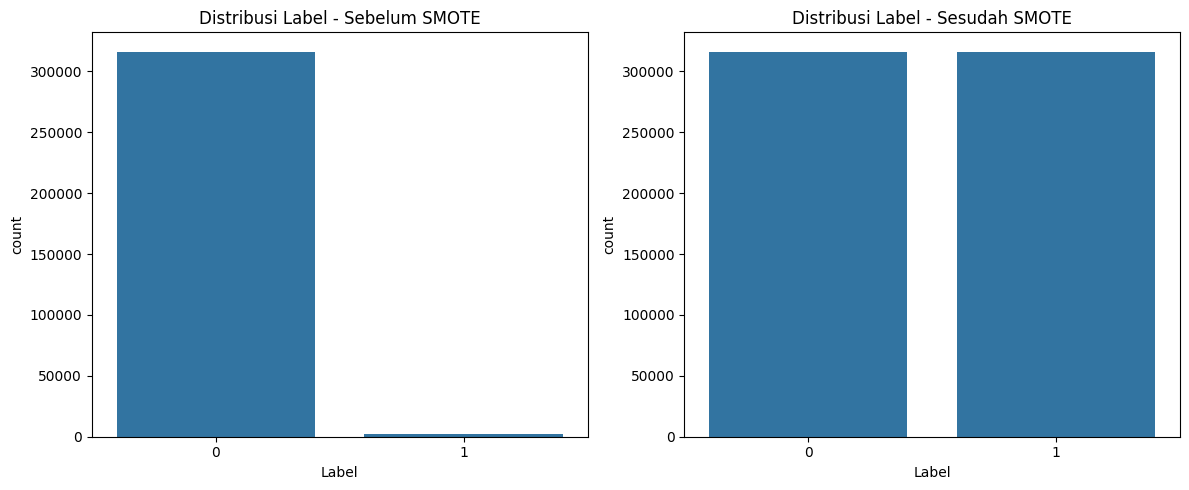

Shape train sebelum SMOTE: (318525, 28)
Shape train sesudah SMOTE: (632416, 28)
Label distribusi (train) sesudah SMOTE:
 Label
0    316208
1    316208
Name: count, dtype: int64


['/content/drive/My Drive/bell/training_cols.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----- 1. Siapkan X, y dan drop kolom raw yang tidak dipakai -----
X = df.drop(columns=['Label']).copy()
y = df['Label'].copy()

drop_cols = [
    'Country', 'ASN', 'TTL', 'IP', 'Domain',
    'longest_word', 'Domain_Name', 'subdomain', 'sld',
    'Organization', 'State'
]
X = X.drop(columns=drop_cols, errors='ignore')

print("Kolom tersisa (awal):", X.columns.tolist())
print("Tipe awal:\n", X.dtypes)

# ----- 2. Coba konversi semua kolom ke numeric bila memungkinkan -----
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# ----- 3. Pilih kolom numerik saja -----
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = [c for c in X.columns if c not in numeric_cols]
if non_numeric_cols:
    print("Kolom non-numeric (akan dibuang):", non_numeric_cols)

X = X[numeric_cols]
print("Numeric cols final:", numeric_cols)
print("Shape setelah filter numeric:", X.shape)

# ----- 4. Tangani inf dan missing -----
X = X.replace([np.inf, -np.inf], np.nan)  # ubah inf jadi NaN
X = X.fillna(X.median())                  # imputasi NaN dengan median

# ----- 5. Clip nilai ekstrem biar tidak bikin error saat scaling -----
X = X.clip(lower=-1e6, upper=1e6)

# ----- 6. Scaling (kembalikan ke DataFrame supaya ada .columns) -----
scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_arr, columns=X.columns)

# ----- 7. Split train-test -----
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Label distribusi (train) sebelum SMOTE:\n", y_train.value_counts())

# ----- 8. Visualisasi distribusi sebelum SMOTE -----
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Distribusi Label - Sebelum SMOTE")
ax[0].set_xlabel("Label")

# ----- 9. SMOTE -----
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_res, ax=ax[1])
ax[1].set_title("Distribusi Label - Sesudah SMOTE")
ax[1].set_xlabel("Label")

plt.tight_layout()
plt.show()

print("Shape train sebelum SMOTE:", X_train.shape)
print("Shape train sesudah SMOTE:", X_train_res.shape)
print("Label distribusi (train) sesudah SMOTE:\n", pd.Series(y_train_res).value_counts())

# Ambil kolom numerik final setelah preprocessing & scaling
training_cols = X_scaled.columns.tolist()

# Simpan ke file .pkl supaya bisa dipakai di Streamlit
joblib.dump(training_cols, "/content/drive/My Drive/bell/training_cols.pkl")



🔹 Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79053
           1       0.85      0.37      0.52       579

    accuracy                           0.99     79632
   macro avg       0.92      0.69      0.76     79632
weighted avg       0.99      0.99      0.99     79632



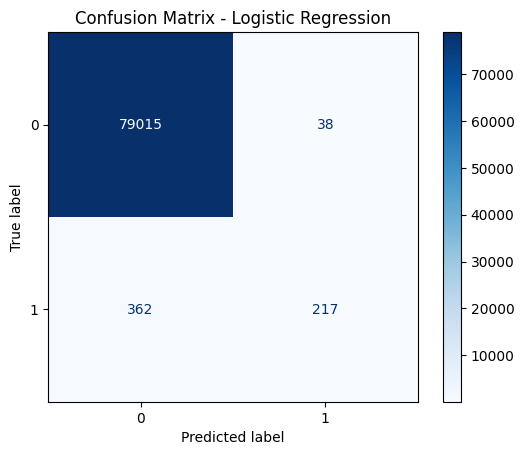

🔹 Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79053
           1       1.00      1.00      1.00       579

    accuracy                           1.00     79632
   macro avg       1.00      1.00      1.00     79632
weighted avg       1.00      1.00      1.00     79632



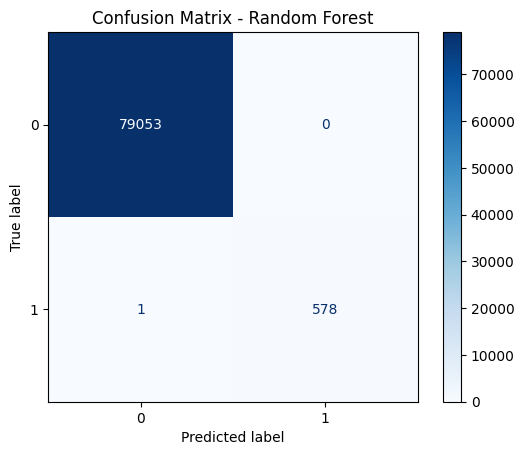

🔹 Model: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:32:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79053
           1       1.00      1.00      1.00       579

    accuracy                           1.00     79632
   macro avg       1.00      1.00      1.00     79632
weighted avg       1.00      1.00      1.00     79632



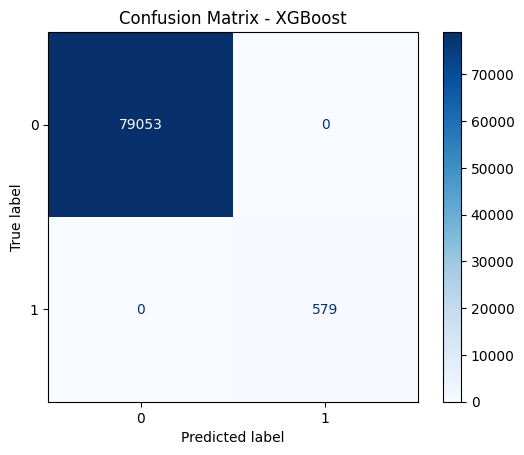

🔹 Model: LightGBM
[LightGBM] [Info] Number of positive: 2317, number of negative: 316208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1664
[LightGBM] [Info] Number of data points in the train set: 318525, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007274 -> initscore=-4.916127
[LightGBM] [Info] Start training from score -4.916127

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79053
           1       0.99      0.99      0.99       579

    accuracy                           1.00     79632
   macro avg       1.00      1.00      1.00     79632
weighted avg       1.00      1.00      1.00     79632



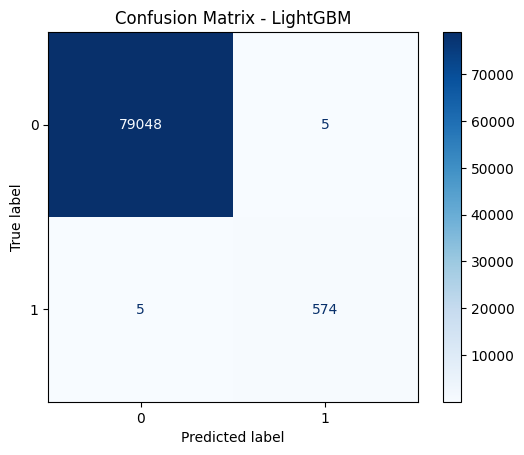

In [ ]:
# Import library model & evaluasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1. Definisikan model ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# --- 2. Training & Evaluasi ---
for name, model in models.items():
    print("="*60)
    print(f"🔹 Model: {name}")

    # Training
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [ ]:
from xgboost import XGBClassifier
import joblib

# --- Inisialisasi dan training ---
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

xgb_model.fit(X_train, y_train)


# # --- Simpan model + scaler ---
# joblib.dump(xgb_model, "/content/drive/My Drive/bell/model_xgb.pkl")
# joblib.dump(scaler, "/content/drive/My Drive/bell/scaler.pkl")


# **TES PREDICT**

In [ ]:
# # === Gunakan model terbaik (XGBoost) ===
# best_model = models["XGBoost"]   # ambil dari dictionary models

# # === fungsi ekstraksi fitur sederhana (tetap sama) ===
# import re
# import numpy as np
# import pandas as pd

# def extract_features(domain: str):
#     domain_len = len(domain)
#     num_digits = sum(c.isdigit() for c in domain)
#     has_digits = int(num_digits > 0)
#     dot_count = domain.count('.')
#     hyphen_count = domain.count('-')
#     digit_ratio = num_digits / domain_len if domain_len > 0 else 0

#     # entropy
#     probs = [domain.count(c)/len(domain) for c in set(domain)]
#     entropy = -sum(p*np.log2(p) for p in probs)

#     features = {
#         "entropy": entropy,
#         "Name_Server_Count": 2,
#         "Page_Rank": 0.2,
#         "domain_len": domain_len,
#         "domain_num_digits": num_digits,
#         "domain_has_digits": has_digits,
#         "domain_dot_count": dot_count,
#         "domain_hyphen_count": hyphen_count,
#         "domain_entropy_raw": entropy,
#         "domain_digit_ratio": digit_ratio,
#         "Domain_Age_days": 100,
#         "Domain_Age_missing": 0,
#         "entropy_missing": 0,
#         "NS_missing": 0,
#         "Page_Rank_missing": 0,
#         "char_distribution_len": domain_len,
#         "2gram_count": 10,
#         "sld_freq": 3,
#         "subdomain_freq": 1,
#         "ASN_freq": 5,
#         "Country_freq": 2,
#         "Organization_freq": 1,
#         "State_freq": 1,
#         "has_email": 0,
#         "emails_count": 0
#     }
#     return features


# # === fungsi prediksi domain ===
# def predict_domain(domain: str, model, feature_cols):
#     feats = extract_features(domain)
#     df = pd.DataFrame([feats], columns=feature_cols)
#     pred = model.predict(df)[0]
#     proba = model.predict_proba(df)[0]
#     return pred, proba


# # === contoh penggunaan ===
# domain_test = "bola77.com"
# prediction, probability = predict_domain(domain_test, best_model, X_train.columns)

# print("Domain:", domain_test)
# print("Prediksi kelas:", prediction)  # 0 = benign, 1 = malware
# print("Probabilitas:", probability)
